In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sys.path.insert(0, os.path.abspath('../..'))
from UKMovementSensing import hsmm

In [5]:
execfile('workflow/config.py')

## Load model

In [36]:
import pickle
with open(os.path.join(model_path, model_name), 'r') as f:
    model = pickle.load(file=f)

In [37]:
print(len(model.states_list))
print(len(model.stateseqs))
len(model.datas)

11
11


11

In [38]:
#Remove all the data and save again
model.states_list = []
print(len(model.datas))
with open(os.path.join(model_path, 'empty_'+model_name), 'w') as f:
    pickle.dump(model, file=f)

0


In [39]:
print(len(model.states_list))
print(len(model.stateseqs))
len(model.datas)

0
0


0

In [13]:
filenames = os.listdir(subset_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(subset_path,fn))]
datasets = [pd.read_csv(os.path.join(subset_path,fn)) for fn in filenames]
X_list = [d[column_names].as_matrix() for d in datasets]

In [35]:
model

In [40]:
predictions = []
for X in X_list[:2]:
    predictions.append(model.predict(X, 0))

In [43]:
print(len(model.states_list))
print(len(model.stateseqs))

0
0


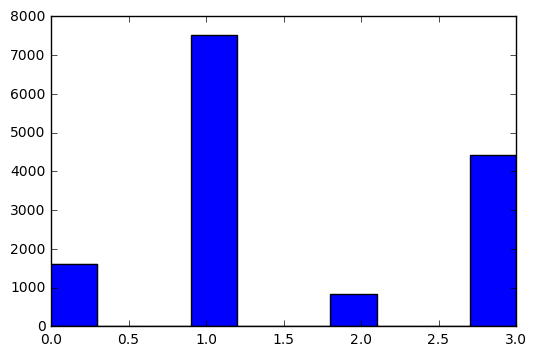

In [42]:
plt.hist(predictions[0][1]);

In [45]:
model.log_likelihood()

0

In [46]:
model.resample_parameters()